<h1> Logistic Regression on KDDCup Data </h1>

In [1]:
#Importing Libraries
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 

In [3]:
#Appending the column names as headers to do the further manipulations
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""
  
columns =[] 
for c in cols.split(', '): 
    if(c.strip()):
        columns.append(c.strip()) 
columns.append('target') 
print(len(columns)) 

42


In [4]:
#Dictionary to divide into key and value pairs 
attacks_types = { 
'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 

In [5]:
#Loading the data that was downloaded in the local machine from the link provided by the professor in the homework details.
#http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
data = pd.read_csv(r"C:\Users\palak\Documents\kddcup.data_10_percent.gz", names = columns) 
# Appending Attack Type column 
data['Attack Type'] = data.target.apply(lambda r:attacks_types[r[:-1]]) 
data.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [6]:
#Trying to see the number of attack types as probe
data[(data['Attack Type']=='probe')]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
22814,1,tcp,private,RSTR,0,0,0,0,0,0,...,0.01,0.04,0.04,0.00,0.01,0.0,0.32,1.0,portsweep.,probe
22815,1,tcp,private,RSTR,0,0,0,0,0,0,...,0.01,0.06,0.10,0.00,0.01,0.0,0.36,1.0,portsweep.,probe
22816,0,tcp,private,REJ,0,0,0,0,0,0,...,0.01,0.09,0.14,0.00,0.01,0.0,0.39,1.0,portsweep.,probe
22817,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.11,0.18,0.00,0.01,0.0,0.42,1.0,portsweep.,probe
22818,1,tcp,private,RSTR,0,0,0,0,0,0,...,0.01,0.12,0.22,0.00,0.01,0.0,0.44,1.0,portsweep.,probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485168,0,icmp,eco_i,SF,18,0,0,0,0,0,...,1.00,0.00,1.00,0.25,0.00,0.0,0.00,0.0,ipsweep.,probe
485169,0,icmp,eco_i,SF,18,0,0,0,0,0,...,1.00,0.00,1.00,0.25,0.00,0.0,0.00,0.0,ipsweep.,probe
485170,0,icmp,eco_i,SF,18,0,0,0,0,0,...,1.00,0.00,1.00,0.25,0.00,0.0,0.00,0.0,ipsweep.,probe
485171,0,icmp,eco_i,SF,18,0,0,0,0,0,...,1.00,0.00,1.00,0.25,0.00,0.0,0.00,0.0,ipsweep.,probe


In [7]:
#Trying to see the number of attack types as not probe
data[(data['Attack Type']!='probe')]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


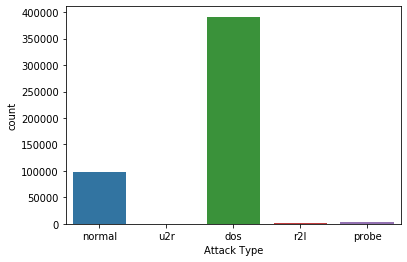

In [8]:
#Plotting the graph to get the understanding of attack types.
sns.countplot(x='Attack Type', data=data)

In [9]:
#Assigning the probe attack type as 0
data[data['Attack Type']=='probe'] = 0

In [10]:
#Assigning the attacks that are not probe as 1
data[~data['Attack Type'].isin([0])] = 1

In [11]:
#Counting the number of attack type as 0 
data[data['Attack Type'] == 0]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
22814,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
22815,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
22816,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
22817,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
22818,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485168,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
485169,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
485170,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
485171,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [12]:
#Counting the number of Attack types as 1
data[data['Attack Type'] == 1]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
494017,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
494018,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
494019,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1


In [13]:
#Dropping the target column
data = data.drop(['target', ], axis = 1)

In [14]:
#Displaying the data
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
494017,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
494018,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
494019,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [15]:
# Target in y and features in x 
y = data[['Attack Type']] 
X = data.drop(['Attack Type', ], axis = 1)

In [16]:
print(y.shape, X.shape)

(494021, 1) (494021, 41)


In [17]:
#Undersampling the data.
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'Attack Type': 1})
Resampled dataset shape Counter({'Attack Type': 1})


In [18]:
# Assigning Numerical Values to Categorical Data
X = pd.get_dummies(X)

In [19]:
#Displaying the data after assigning Numerical Values to Categorical Data
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
494017,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
494018,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
494019,1,1,1,1,1,1,1,1,1,1,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [20]:
#Scaling
sc = MinMaxScaler() 
X = sc.fit_transform(X)

In [21]:
# Splitting the data into test and train data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape)

(395216, 41) (98805, 41)
(395216, 1) (98805, 1)


In [47]:
#Applying the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.001,penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [48]:
# Getting predictions
y_hat = model.predict(X_test)

In [49]:
#Getting an idea to see how many values are truly predicted
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [50]:
from sklearn import metrics

In [51]:
#Testing Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [52]:
ytrain_pred = pd.Series(model.predict(X_train))

In [53]:
#Training Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, ytrain_pred))

Accuracy: 1.0


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

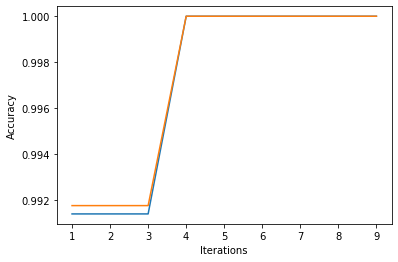

In [55]:
#Plotting the graphs to understand where does the model converge which is near to 4 in this case. The model is not overfitting as the accuracy of test andd train data is nearly the same. 
test_accuracy=[]
train_accuracy = []
iterations=list(range(1,10))
for i in iterations:
    LR=LogisticRegression(max_iter=i)
    LR.fit(X_train,y_train)
    Test_Predictions=np.array(LR.predict(X_test))
    Train_Predictions=np.array(LR.predict(X_train))
    test_accuracy.append(LR.score(X_test,y_test))
    train_accuracy.append(LR.score(X_train,y_train))
plt.plot(iterations,test_accuracy)
plt.plot(iterations,train_accuracy)
#Plotting graph iterations vs accuracy
plt.ylabel("Accuracy")
plt.xlabel("Iterations")
plt.show()

Weights :  [[2.31147768e-11 6.14606742e-02 0.00000000e+00 1.98979485e+00
  1.88796369e-11 9.82953865e-01 2.31147768e-11 0.00000000e+00
  0.00000000e+00 8.59963441e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.58003476e-11
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.16360838e-01 0.00000000e+00 6.58003476e-11 1.11261188e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.95700221e-03 0.00000000e+00 1.05964745e-10 4.09970917e-11
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.58003476e-11 0.00000000e+00 1.88796369e-11 0.00000000e+00
  6.43498240e-01]]


C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


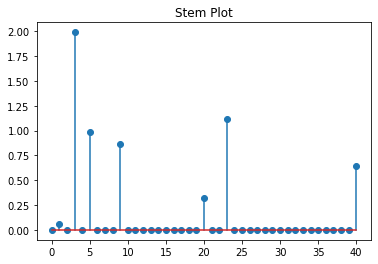

In [54]:
#Displaying weights, according to the weights and grpha we can say that flag,src_bytes has the largest weight values. Yes, It makes sense because to determine that attack is taking place or not needs these features.  
weights=model.coef_.flatten()
print("Weights : ",model.coef_)
plt.stem(weights)
plt.title("Stem Plot")
plt.show()

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
L1 Weights :  [[2.43481660e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.66783374e-11
  2.66783374e-11 1.11261188e+00 0.00000000e+00 0.00000000e+00
  2.66783374e-11 0.00000000e+00 0.00000000e+00 6.43498240e-01
  2.66783374e-11 6.14606742e-02 1.95700217e-03 8.59963441e-01
  0.00000000e+00 2.66783374e-11 0.00000000e+00 2.66783374e-11
  0.00000000e+00 9.82953865e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.67874829e-11 3.16360838e-01 2.66783374e-11
  0.00000000e+00 0.00000000e+00 2.66783374e-11 0.00000000e+00
  0.00000000e+00 1.98979485e+00 2.66783374e-11 2.66783374e-11
  2.66783374e-11]]


C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


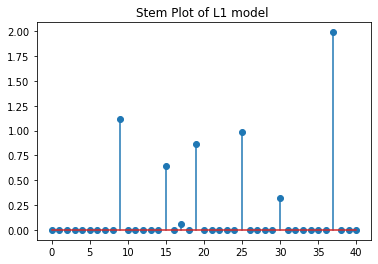

In [62]:
#Using L1 regularization
l1=LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
l1.fit(X_train, y_train)
print("Train Accuracy:", metrics.accuracy_score(l2.predict(X_train), y_train))
print("Accuracy:", metrics.accuracy_score(l1.predict(X_test), y_test))
print("Precision:", metrics.precision_score(l1.predict(X_test), y_test))
print("Recall:", metrics.recall_score(l1.predict(X_test), y_test))
print("L1 Weights : ",l1.coef_)
weights_l1=l1.coef_.flatten()
plt.stem(weights_l1)
plt.title("Stem Plot of L1 model ")
plt.show()

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
L2 Weights :  [[0.47844821 0.47844821 0.47844821 0.47844821 0.47844821 0.47844821
  0.47844821 0.47844821 0.47844821 0.47844821 0.47844821 0.47844821
  0.47844821 0.47844821 0.47844821 0.47844821 0.47844821 0.47844821
  0.47844821 0.47844821 0.47844821 0.47844821 0.47844821 0.47844821
  0.47844821 0.47844821 0.47844821 0.47844821 0.47844821 0.47844821
  0.47844821 0.47844821 0.47844821 0.47844821 0.47844821 0.47844821
  0.47844821 0.47844821 0.47844821 0.47844821 0.47844821]]


C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


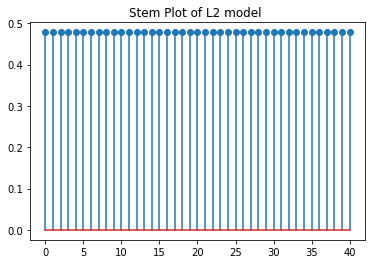

In [61]:
#Using l2 regularization
l2=LogisticRegression(penalty='l2', solver='liblinear')
l2.fit(X_train, y_train)
print("Train Accuracy:", metrics.accuracy_score(l2.predict(X_train), y_train))
print("Accuracy:", metrics.accuracy_score(l2.predict(X_test), y_test))
print("Precision:", metrics.precision_score(l2.predict(X_test), y_test))
print("Recall:", metrics.recall_score(l2.predict(X_test), y_test))
print("L2 Weights : ",l2.coef_)
weights_l2=l2.coef_.flatten()
plt.stem(weights_l2)
plt.title("Stem Plot of L2 model ")
plt.show()

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
L2 Weights :  [[0.20399098 0.20399098 0.20399098 0.20399098 0.20399098 0.20399098
  0.20399098 0.20399098 0.20399098 0.20399098 0.20399098 0.20399098
  0.20399098 0.20399098 0.20399098 0.20399098 0.20399098 0.20399098
  0.20399098 0.20399098 0.20399098 0.20399098 0.20399098 0.20399098
  0.20399098 0.20399098 0.20399098 0.20399098 0.20399098 0.20399098
  0.20399098 0.20399098 0.20399098 0.20399098 0.20399098 0.20399098
  0.20399098 0.20399098 0.20399098 0.20399098 0.20399098]]


C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


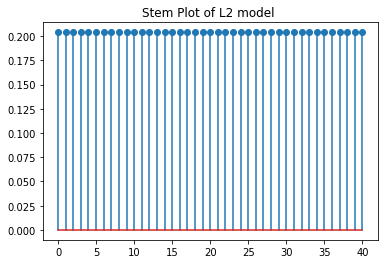

In [60]:
#Different l2 regularization
l2=LogisticRegression(C=0.001, penalty='l2', solver='liblinear')
l2.fit(X_train, y_train)

print("Train Accuracy:", metrics.accuracy_score(l2.predict(X_train), y_train))
print("Accuracy:", metrics.accuracy_score(l2.predict(X_test), y_test))
print("Precision:", metrics.precision_score(l2.predict(X_test), y_test))
print("Recall:", metrics.recall_score(l2.predict(X_test), y_test))
print("L2 Weights : ",l2.coef_)
weights_l2=l2.coef_.flatten()
plt.stem(weights_l2)
plt.title("Stem Plot of L2 model ")
plt.show()

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train Accuracy: 0.9917589368851464
Accuracy: 0.9913971964981529
Precision: 1.0
Recall: 0.9913971964981529
L2 Weights :  [[0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986
  0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986
  0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986
  0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986
  0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986
  0.0139986 0.0139986 0.0139986 0.0139986 0.0139986 0.0139986]]


C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


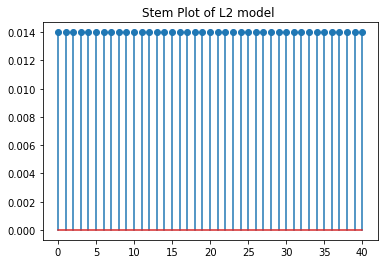

In [58]:
##Different l2 regularization
l2=LogisticRegression(C=0.0000001, penalty='l2', solver='liblinear')
l2.fit(X_train, y_train)
print("Train Accuracy:", metrics.accuracy_score(l2.predict(X_train), y_train))
print("Accuracy:", metrics.accuracy_score(l2.predict(X_test), y_test))
print("Precision:", metrics.precision_score(l2.predict(X_test), y_test))
print("Recall:", metrics.recall_score(l2.predict(X_test), y_test))
print("L2 Weights : ",l2.coef_)
weights_l2=l2.coef_.flatten()
plt.stem(weights_l2)
plt.title("Stem Plot of L2 model ")
plt.show()

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train Accuracy: 0.9917589368851464
Accuracy: 0.9913971964981529
Precision: 1.0
Recall: 0.9913971964981529
L2 Weights :  [[0.05956216 0.05956216 0.05956216 0.05956216 0.05956216 0.05956216
  0.05956216 0.05956216 0.05956216 0.05956216 0.05956216 0.05956216
  0.05956216 0.05956216 0.05956216 0.05956216 0.05956216 0.05956216
  0.05956216 0.05956216 0.05956216 0.05956216 0.05956216 0.05956216
  0.05956216 0.05956216 0.05956216 0.05956216 0.05956216 0.05956216
  0.05956216 0.05956216 0.05956216 0.05956216 0.05956216 0.05956216
  0.05956216 0.05956216 0.05956216 0.05956216 0.05956216]]


C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


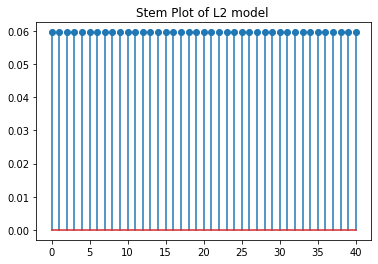

In [57]:
#Different l2 regularization
l2=LogisticRegression(C=0.000002, penalty='l2', solver='liblinear')
l2.fit(X_train, y_train)
print("Train Accuracy:", metrics.accuracy_score(l2.predict(X_train), y_train))
print("Accuracy:", metrics.accuracy_score(l2.predict(X_test), y_test))
print("Precision:", metrics.precision_score(l2.predict(X_test), y_test))
print("Recall:", metrics.recall_score(l2.predict(X_test), y_test))
print("L2 Weights : ",l2.coef_)
weights_l2=l2.coef_.flatten()
plt.stem(weights_l2)
plt.title("Stem Plot of L2 model ")
plt.show()